A brief data analysis of some of the worst reviews Yelp has to offer 

In [61]:
#packages to install 
%conda install -c conda-forge wordcloud
%pip install folium
%pip install langdetect

Solving environment: done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [62]:
#Packages to import and why
import nltk                                 #language processing
import folium                               #maps
import logging                              #best practices make best perfects
import numpy as np                          #math stuff
import pandas as pd                         #data processing
import seaborn as sns                       #also data visualization 
import matplotlib.pyplot as plt             #data visualization
from wordcloud import WordCloud, STOPWORDS  #wordclouds and useless words
from langdetect import detect_langs         #get language of reviews bc German is too negative 
from nltk.sentiment.vader import SentimentIntensityAnalyzer  #sentiment analysis of text

nltk.download('vader_lexicon')
%matplotlib inline 

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/tifanyables/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [63]:
#logging stuff
Log_format = "%(levelname)s %(asctime)s - %(message)s"

logging.basicConfig(
    filename = "logfile.log",
    filemode = "w", 
    format = Log_format,
    level = logging.WARNING)

logger = logging.getLogger()

#Test that logger 
logger.error("Let's GO")

In [64]:
# Read business file 
#business = pd.read_csv('/Users/tifanyables/Desktop/Welp/yelp_dataset/yelp_business.csv',  index_col=False)
business = pd.read_csv('https://docs.google.com/spreadsheets/d/12rEscRSc6wu4tcK_n__fIq_AjcQ1IRqjHZ6FhO8REsA/gviz/tq?tqx=out:csv',  index_col=False)


In [65]:
business.head()

,business_id,name,neighborhood,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,FYWN1wneV18bWNgQjJ2GNg,"""Dental by Design""",NaN,"""4855 E Warner Rd, Ste B9""",Ahwatukee,AZ,85044.0,33.330690,-111.978599,4.0,22,1,Dentists;General Dentistry;Health & Medical;Or...
1,He-G7vWjzVUysIKrfNbPUQ,"""Stephen Szabo Salon""",NaN,"""3101 Washington Rd""",McMurray,PA,15317.0,40.291685,-80.104900,3.0,11,1,Hair Stylists;Hair Salons;Men's Hair Salons;Bl...
2,KQPW8lFf1y5BT2MxiSZ3QA,"""Western Motor Vehicle""",NaN,"""6025 N 27th Ave, Ste 1""",Phoenix,AZ,85017.0,33.524903,-112.115310,1.5,18,1,Departments of Motor Vehicles;Public Services ...
3,8DShNS-LuFqpEWIp0HxijA,"""Sports Authority""",NaN,"""5000 Arizona Mills Cr, Ste 435""",Tempe,AZ,85282.0,33.383147,-111.964725,3.0,9,0,Sporting Goods;Shopping
4,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""",NaN,"""581 Howe Ave""",Cuyahoga Falls,OH,44221.0,41.119535,-81.475690,3.5,116,1,American (New);Nightlife;Bars;Sandwiches;Ameri...


In [66]:
#specific columns from business  
business_cols = business[['business_id','name', 'address', 'state', 'postal_code', 'latitude', 'longitude', 'is_open', 'categories']]

In [67]:
#only restaurants 
bus_rests = business_cols[business_cols['categories'].str.contains('Restaurant')] 

In [68]:
len(bus_rests)

54630

In [69]:
#only keep open restarants 
open_rest = bus_rests[bus_rests['is_open']== 1]

In [70]:
len(open_rest)

40405

In [71]:
#drop unneeded columns and reset index 
open_rest = open_rest.drop(columns=['is_open', 'categories']).reset_index(drop=True)

In [72]:
open_rest.head()

,business_id,name,address,state,postal_code,latitude,longitude
0,PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",OH,44221.0,41.119535,-81.475690
1,o9eMRCWt5PkpLDE0gOPtcQ,"""Messina""","""Richterstr. 11""",BW,70567.0,48.727200,9.147950
2,fNMVV_ZX7CJSDWQGdOM8Nw,"""Showmars Government Center""","""600 E 4th St""",NC,28202.0,35.221647,-80.839345
3,Gu-xs3NIQTj3Mj2xYoN2aw,"""Maxim Bakery & Restaurant""","""9665 Bayview Avenue, Unit 1-4""",ON,NaN,43.867565,-79.412662
4,1K4qrnfyzKzGgJPBEcJaNQ,"""Chula Taberna Mexicana""","""1058 Gerrard Street E""",ON,NaN,43.669256,-79.335902


Review Stuff

In [73]:
# Read review file 
review = pd.read_csv('/Users/tifanyables/Desktop/Welp/yelp_dataset/yelp_review.csv')

In [74]:
len(review)

5261668

In [75]:
#drop unneeded columns and reset index 
review = review.drop(columns=['review_id', 'user_id', 'useful', 'funny', 'cool', 'date'])

In [76]:
rest_ids = set(open_rest['business_id'])

In [77]:
# filter out any place that isn't in rest ids
rest_reviews = review[review['business_id'].isin(rest_ids)]

In [78]:
rest_reviews.head()

,business_id,stars,text
0,AEx2SYEUJmTxVVB18LlCwA,5,Super simple place but amazing nonetheless. It...
1,VR6GpWIda3SfvPC-lg9H3w,5,Small unassuming place that changes their menu...
2,CKC0-MOWMqoeWf6s-szl8g,5,Lester's is located in a beautiful neighborhoo...
3,ACFtxLv8pGrrxMm6EgjreA,4,Love coming here. Yes the place always needs t...
4,s2I_Ni76bjJNK9yG60iD-Q,4,Had their chocolate almond croissant and it wa...


In [79]:
rest_reviews['business_id'].nunique()

40405

In [80]:
len(rest_reviews)

2774509

In [81]:
#count of star ratings 
rest_reviews.groupby(['stars']).size().reset_index()

,stars,0
0,1,305702
1,2,257352
2,3,378467
3,4,756626
4,5,1076362


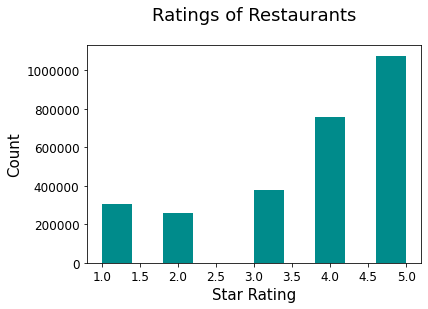

In [82]:
# histplot for star ratings of reviews

rest_reviews['stars'].hist(grid=False, color="darkcyan", xlabelsize=12, ylabelsize=12)
plt.title('Ratings of Restaurants',fontsize=18, pad=25.0) 
plt.xlabel("Star Rating", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.ticklabel_format(style='plain', axis='y',useOffset=False)
plt.show()

In [83]:
rest_reviews.set_index('business_id', inplace=True)
open_rest.set_index('business_id', inplace=True)

In [84]:
# filter out only 1 star reviews
one_stars = rest_reviews.loc[rest_reviews['stars'] == 1] 

One star reviews for open restaurants with business info attached 

In [85]:
#combine csvs into mega csv 
one_star_reviews= open_rest.merge(one_stars, on= ["business_id"])

In [86]:
one_star_reviews.head()

,name,address,state,postal_code,latitude,longitude,stars,text
business_id,,,,,,,,
PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",OH,44221.0,41.119535,-81.47569,1,Worse service ever andI use to be a server so ...
PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",OH,44221.0,41.119535,-81.47569,1,1st and foremost I will tell you the food here...
PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",OH,44221.0,41.119535,-81.47569,1,Do not recommend. Ordered a lamb burger medium...
PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",OH,44221.0,41.119535,-81.47569,1,So my family and I went to Brickhouse yesterda...
PfOCPjBrlQAnz__NXj9h_w,"""Brick House Tavern + Tap""","""581 Howe Ave""",OH,44221.0,41.119535,-81.47569,1,Sitting here and not wanting to wait until I l...


Sentiment Analysis 

In [87]:
#sentiment analysis with a little progress bar, as a treat 
analyzer = SentimentIntensityAnalyzer()

hundredth = len(one_star_reviews)//100

compound_scores = []

for i, Review in enumerate(one_star_reviews['text']):
    compound_scores.append(analyzer.polarity_scores(Review)['compound'])
    print((i//hundredth)*'|' + (99-i//hundredth)*' ' + '|', end='\r')

one_star_reviews['compound'] = compound_scores

In [88]:
#add column to df for compound scores
one_star_reviews = one_star_reviews.sort_values(by='compound')

In [89]:
compound_mean = one_star_reviews['compound'].mean()
print(compound_mean)

-0.14635714028692945


Language detection 

In [90]:
bottom_dwellers = one_star_reviews.head(700)

In [91]:
language = [detect_langs(i) for i in bottom_dwellers.text]
languages = [str(i[0]).split(':')[0] for i in language]
bottom_dwellers['language'] = languages

/var/folders/lf/n1rw9kdd3csgtpmvzst_92pr0000gn/T/ipykernel_11149/2428245652.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_dwellers['language'] = languages


In [92]:
# only keep English reviews
bottom_dwellers = bottom_dwellers[bottom_dwellers['language']== 'en']

In [93]:
len(bottom_dwellers)

554

Worst 500 reviews by compound score

In [94]:
bottom_dwellers = bottom_dwellers.head(500)

In [95]:
bottom_dweller_mean = bottom_dwellers['compound'].mean()
print(bottom_dweller_mean)

-0.9950786000000006


Map making

In [96]:
#make a basemap 
USA = [37.090240, -95.712891]
Map = folium.Map(USA, zoom_start=4, tiles= "Stamen Toner")

In [97]:
#add points to that map
for i in range(0, len(bottom_dwellers)):
    name = bottom_dwellers.iloc[i]["name"][1:-1]
    msg = f'''
    <center><h2>{name}</h2></center>
    <p>{bottom_dwellers.iloc[i]["text"]}</p>
    '''
    iframe = folium.IFrame(html=msg, width=400, height=300)
    folium.Marker(
        [bottom_dwellers.iloc[i] ["latitude"], bottom_dwellers.iloc[i]["longitude"]],
        tooltip=name,
        popup=folium.Popup(iframe, max_width=400)
    ).add_to(Map)

Map

Word clouding 

In [98]:
# join all reviews and get a count of words to start making a wordcloud also lower case them 
turd_soup= " ".join(bottom_dwellers['text']).lower()

# how many words?  
print ("There are {} words in the combination of the 500 worst reviews.".format(len(turd_soup.split(' '))))
# how many stopwords? 
print ("There are {} stopwords.".format(len(STOPWORDS))) #how many uselessly common words?

There are 225428 words in the combination of the 500 worst reviews.
There are 204 stopwords.


In [99]:
STOPWORDS.update(["will", "let", "well", "u","us", "another", "go", "got", "came", "come", "put", "going" ]) #stopwords updated 
print ("Now there are {} stopwords.".format(len(STOPWORDS))) 

Now there are 204 stopwords.


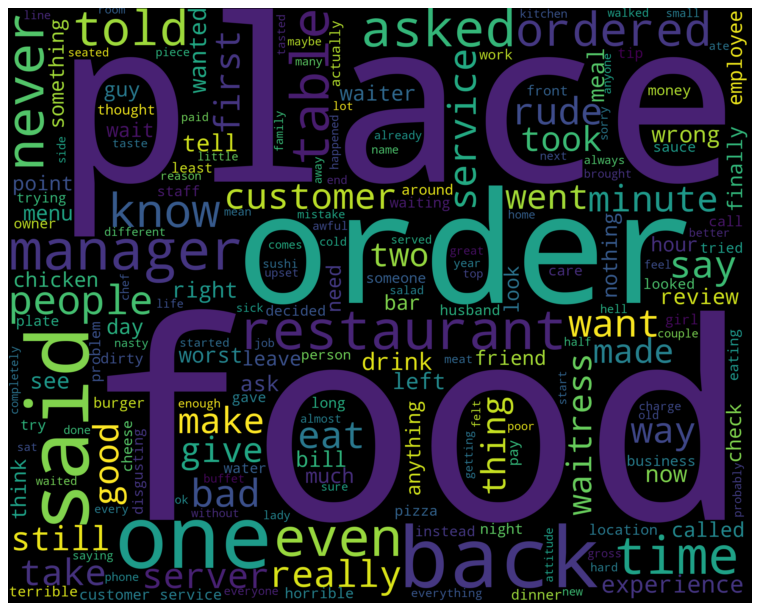

In [100]:
# make wordcloud of 1 star reviews with stop words removed  
another_turd_cloud = WordCloud(stopwords=STOPWORDS, width =2500, height= 2000, max_words=200, random_state=42).generate(turd_soup)

# show wordcloud 
plt.figure(figsize= (12, 10), dpi=80)
plt.imshow(another_turd_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()